In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [290]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        self.dt = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        self.radius = radius
        self.Id = Id
        self.p = self.m*self.v
        self.f = self.m*self.a
        self.l = np.cross(self.r, self.p)
        self.ep = self.m*9.8*self.r[1]
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)
        self.P = np.zeros_like(self.R)
        self.K = 20.
        self.VEk = np.zeros(len(t))
        self.L = np.zeros_like(self.R)
        self.Vep = np.zeros(len(t))
    def Evolution(self,i):
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetAceleration(i)
        self.SetPotential(i)
        self.SetForce(i)
    
        
    
    
    
        #la unica fuerza presente es la gravedad, la cual es constante, por lo tanto la aceleracion es constante
        self.a[1] = -9.8/self.m
        
        
        
        
        
        
        self.f = self.m*self.a
        self.ep = self.m*9.8*self.r[1]
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Setter
    
    def SetPotential(self,i):
        self.Vep[i] = self.m*self.r[1]*9.8 
    
    def SetForce(self,i):
        self.F = self.m*self.a
    def SetPosition(self,i):
        self.R[i] = self.r
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    def SetAceleration(self,i):
        self.A[i] = self.a
    # Getter
    def GetVelocity(self,scale=1):
        return self.F[::scale]
        
    def GetVelocity(self,scale=1):
        return self.Vep[::scale]
    def GetPosition(self,scale=1):
        return self.R[::scale]
    def GetPotentential(self,scale=1):
        return self.Vep[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    def GetForce(self,scale=1):
        return self.F[::scale] 
    # Debes agregar las paredes en este punto
    def CheckLimits(self):
        
        for i in range(2):
            
            if self.r[i] + self.radius > 20 and self.v[i] > 0.:
                self.v[i] = -0.9*self.v[i]
            elif self.r[i] - self.radius < -20 and self.v[i] < 0.:
                self.v[i] = -0.9*self.v[i]

In [291]:
def GetParticles(N,t):
    r0 = np.array([-15.,-10.])
    v0 = np.array([2.,0])
    a0 = np.array([0.,0.])
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    Particles = [p0]
    return Particles

In [306]:
dt = 0.001
tmax = 30
t = np.arange(0,tmax,dt)
Particles = GetParticles(1,t)

In [307]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #for i in range(len(Particles)):
        #    for j in range(len(Particles)):
        #        if i!=j:
        #Particles[0].CalculateForce()
        
        #for i in range(len(Particles)):
        Particles[0].Evolution(it)
        Particles[0].ResetForce()
        Particles[0].CheckLimits()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [308]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 30000/30000 [00:00<00:00, 45377.97 Steps/s]


In [309]:
# Bajamos dimensión de la simulacion
scale = 100
t1 = t[::scale]

<IPython.core.display.Javascript object>


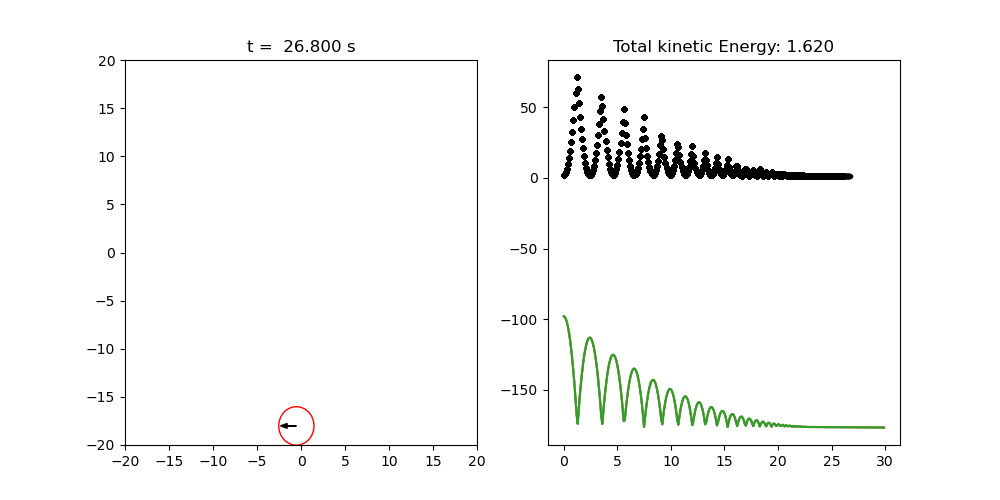

In [310]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

# La esfera deja de rebotar aproximadamente despues de los 23 segundos, note que para este tiempo la energia potencial y cinetica son aproximadamente cero

In [319]:
Pot = Particles[0].GetPotentential(scale)


<IPython.core.display.Javascript object>


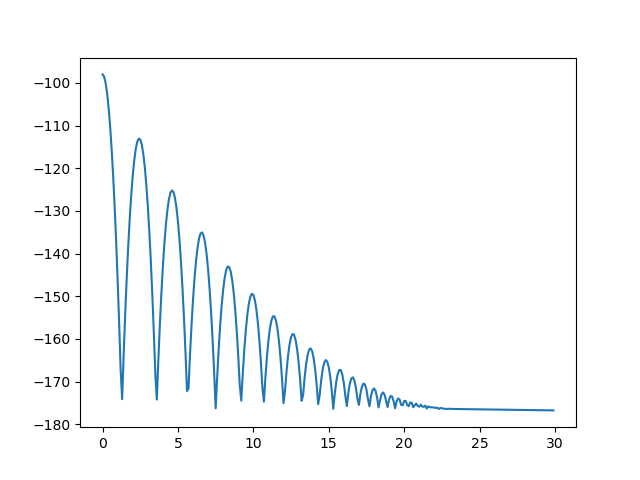

In [320]:
plt.plot(t1,Pot)

In [316]:
Force = Particles[0].GetForce(scale)

In [317]:
MomentumT = Particles[0].GetMomentum(scale)

<IPython.core.display.Javascript object>


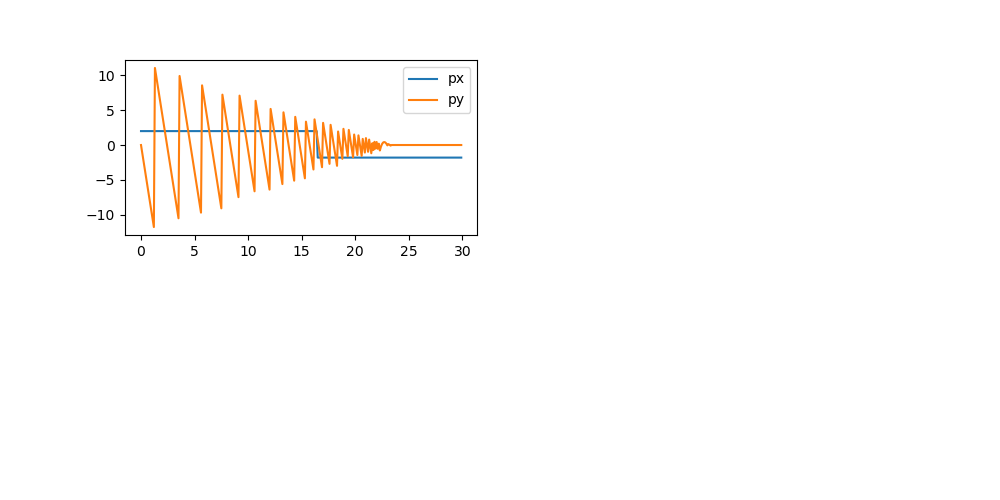

In [318]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()